## Final Project Submission

Please fill out:
* Student name: Dennis Kobia
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Stella waithera
* Blog post URL:


## House Sales in King County, Washington, USA

## Overview
The project aims to provide provide actionable insights to a real estate firm by analyzing aspects of the houses datasets to guide their decision-making process. These insights can help them develop a strategic plan to invest in profitable homes and compete effectively in the real estate industry.

## Business Understanding
A real estate firm needs a reliable model to predict house prices based on its features. With an accurate estimate, the firm can quickly identify underpriced houses to invest in and generate the maximum amount of profit upon resale.

## Data Understanding
We used data sourced from King County Housing Dataset CSV. The data represents houses with information on price, bedrooms, bathrooms, sqft living, sqft lot, floors, view, aqnd year built. Total data used was from 21597 homes split 80/20 for training and testing. Variables include price, bedrooms, bathrooms, sqft living, sqft lot, floors, view, aqnd year built.

Properties of variables of interest:
1. Price: Continuous numeric (float). Represents the sale price of houses in the dataset.
2. Bedrooms: Discrete numeric (integer). Represents the number of bedrooms in each house.
3. Bathrooms: Continuous numeric (float).Represents the number of bathrooms in each house.
4. Sqft living: Continuous numeric (integer). Represents the total square footage of the living space in each house.
5. Floors: Discrete numeric (float). Represents the number of floors in each house.
6. View: Categorical (object). Represents the view rating of the property.
7. Year built: Discrete numeric (integer). Represents the year each house was built.

## Data Preparation
The following describes the data cleaning process to remove any inconsistencies in the data and prepare it for analysis and modeling.

1. Importing Libraries: Importing the necessary Python libraries, including Pandas, NumPy, Matplotlib, and Seaborn, which are commonly used for data manipulation and visualization.
2. Data Loading: Reading the house data from a CSV file ("kc_house_data.csv") into a Pandas DataFrame using pd.read_csv().
3. Data Cleaning: Used house _data_df.head() to inspect the first few rows of the DataFrame. Checked the shape of the DataFrame using house_data_df.shape to determine the number of rows and columns. Used house_data_df.info() to get information about the data types and missing values in each column. Checked for duplicate rows using house_data_df.duplicated().
4. Data Exploration: Created various visualizations to explore the relationships between variables, such as scatter plots and box plots, to understand how features like square footage, the number of bathrooms, bedrooms, floors, and year built relate to house prices.
5. Investigate polynomial relationships and interactions between variables in greater details.

In [81]:
# Your code here - remember to use markdown cells for comments as well!
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Reading the house data into a DataFrame
house_data_df = pd.read_csv("data/kc_house_data.csv")

In [83]:
# Exploring the structure and content of the DataFrame
house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [84]:
# Inspecting the shape
house_data_df.shape

(21597, 21)

In [85]:
# Looking at the info printout
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [86]:
# Cheking whether there are missing values
house_data_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [87]:
# Dropping null values in the 'view' column
#house_data_df = house_data_df.dropna(subset=['view'])
# Replace null values with 0
house_data_df = house_data_df.fillna(0)

In [88]:
# Cheking for duplicates
house_data_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [89]:
# Summary statistics for the numerical columns in the DataFrame
summary_statistics = house_data_df.describe()
print(summary_statistics)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     68.758207   
std    4.141264e+04      0.539683    827.759761    

## Price Distribution with Outliers

In [90]:
# Calculating summary statistics for the 'price' column.
price_summary = house_data_df['price'].describe()
print(price_summary)

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


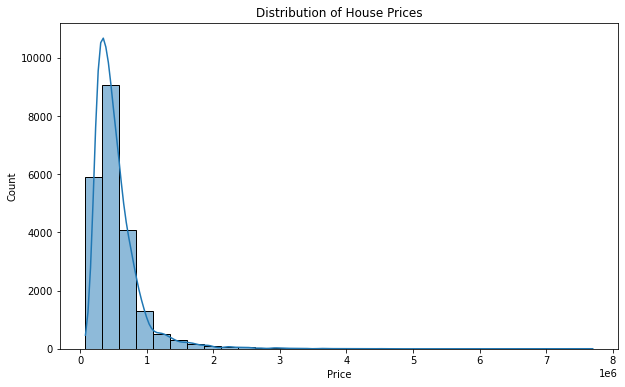

In [91]:
# Data Exploration
# Exploring the data by plotting some graphs to visualize the distribution of features.
# Using seaborn to create a histogram of the 'price' column.
plt.figure(figsize=(10, 6))
sns.histplot(house_data_df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Price Distribution without Outliers

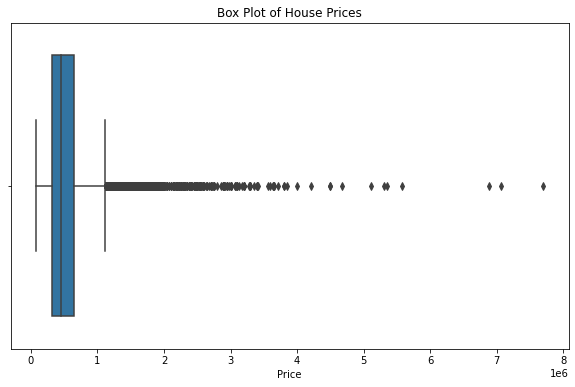

In [92]:
# Creating a box plot to identify outliers in the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=house_data_df['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

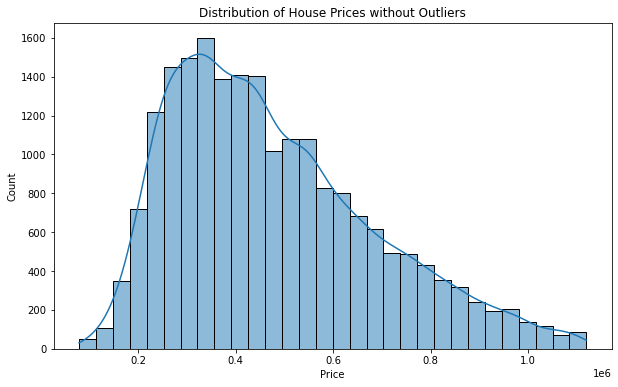

In [93]:
# Calculating the Interquartile Range (IQR) to identify outliers
Q1 = house_data_df['price'].quantile(0.25)
Q3 = house_data_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to exclude outliers
filtered_house_data = house_data_df[(house_data_df['price'] >= lower_bound) & (house_data_df['price'] <= upper_bound)]

# Creating a histogram of house prices without outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_house_data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices without Outliers')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [94]:
print(filtered_house_data.shape)
print(house_data_df.shape)

(20439, 21)
(21597, 21)


## What is the relationship between sqft_living of a house and its price?

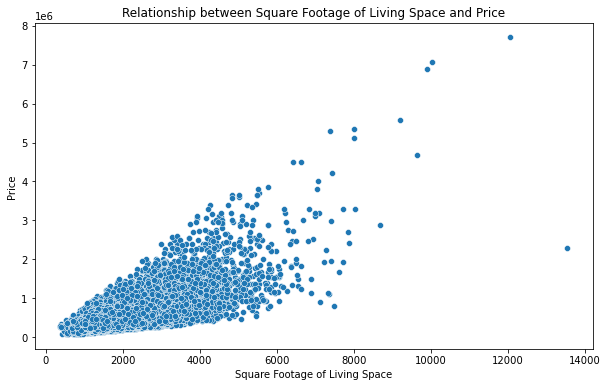

In [95]:
# Exploring the relationships between variables using scatter plots or pair plots.
# Checking the relationship between 'sqft_living' and 'price'.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_data_df)
plt.title('Relationship between Square Footage of Living Space and Price')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.show()

## How does the number of bathrooms affect the price of a house?

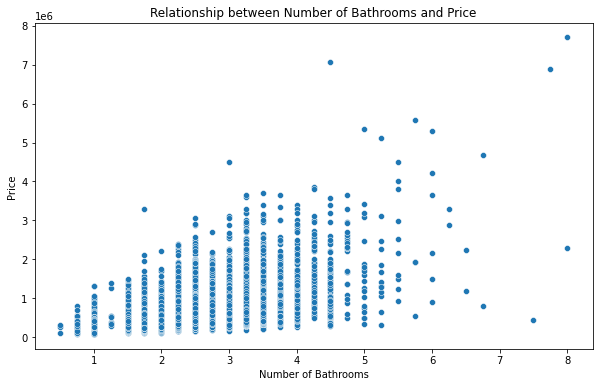

In [96]:
# Checking the relationship between 'bathrooms' and 'price'.
# Creating a scatterplot to visualize the relationship between 'bathrooms' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=house_data_df)
plt.title('Relationship between Number of Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

## Are price and number of bedrooms correlated?

In [97]:
# Data Analysis
# Performing various data analyses and calculations to gain insights into the dataset. 
# Calculating the average price per bedroom.
average_price_per_bedroom = house_data_df.groupby('bedrooms')['price'].mean()
print(average_price_per_bedroom)

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64


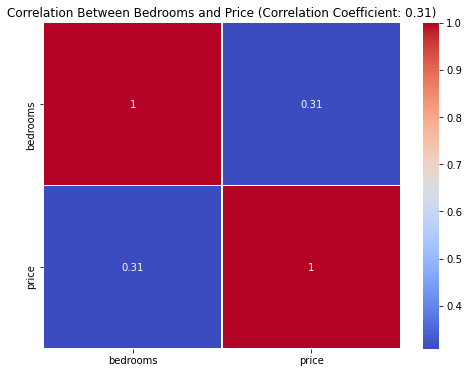

In [98]:
# Calculating the average price per bedroom.
# Calculating the Pearson correlation coefficient between 'bedrooms' and 'price'
correlation = house_data_df['bedrooms'].corr(house_data_df['price'])

# Creating a correlation heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(data=house_data_df[['bedrooms', 'price']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Between Bedrooms and Price (Correlation Coefficient: {correlation:.2f})')
plt.show()


## What is the relationship between the year a house was built and its price?

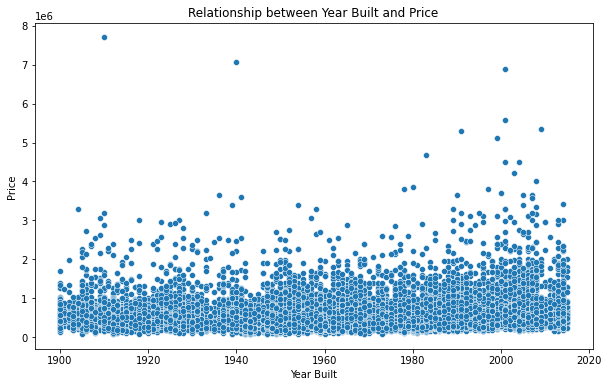

In [99]:
# Creating a scatterplot to visualize the relationship between 'yr_built' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='price', data=house_data_df)
plt.title('Relationship between Year Built and Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

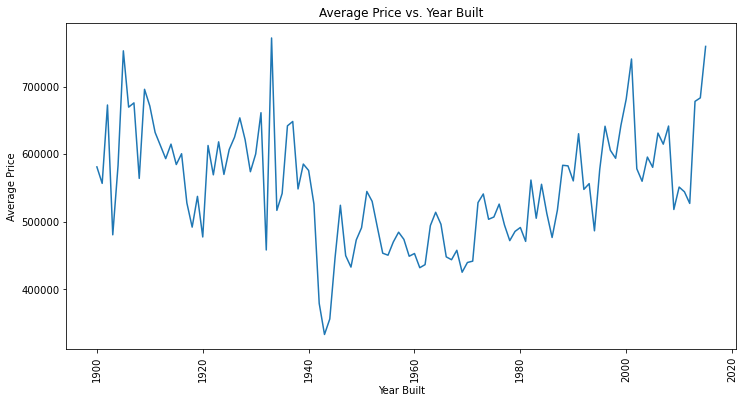

In [100]:
# Grouping the data by 'yr_built' and calculating the average price for each year
average_price_by_year = house_data_df.groupby('yr_built')['price'].mean().reset_index()

# Creating a line plot to visualize the relationship between 'yr_built' and 'price'
plt.figure(figsize=(12, 6))
sns.lineplot(x='yr_built', y='price', data=average_price_by_year)
plt.title('Average Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


## How does the number of floors affect the price of a house?

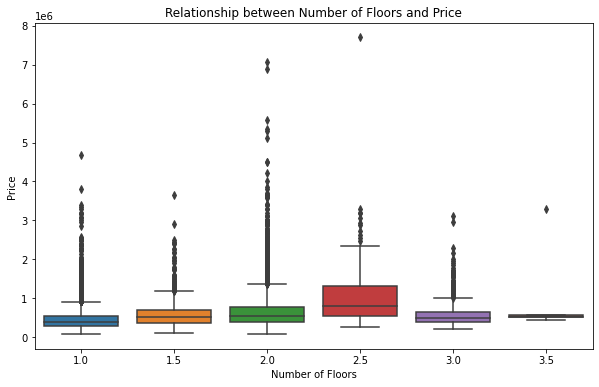

In [101]:
# Creating a boxplot to visualize the relationship between 'floors' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='price', data=house_data_df)
plt.title('Relationship between Number of Floors and Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()

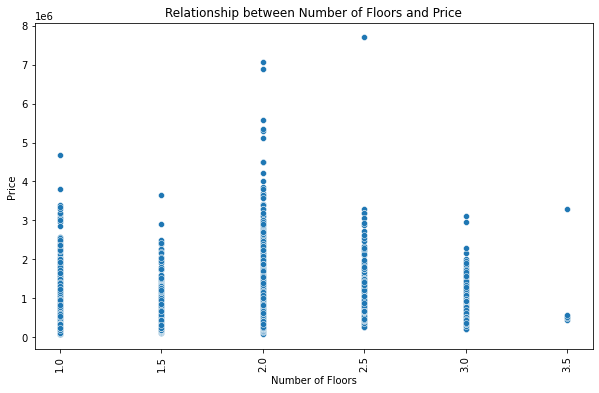

In [102]:
# Creating a scatter plot to visualize the relationship between 'floors' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floors', y='price', data=house_data_df)
plt.title('Relationship between Number of Floors and Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [103]:
data =pd.read_csv('data\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [104]:
data.shape

(21597, 21)

THE START OF MODELLING AND REGRESSION ANALYSIS

In [105]:
#Importing the Necessary Libraries for modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [106]:
for col in house_data_df.columns:
    print(house_data_df[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
2/15/2015       1
5/24/2015       1
11/30/2014      1
11/2/2014       1
5/17/2014       1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25

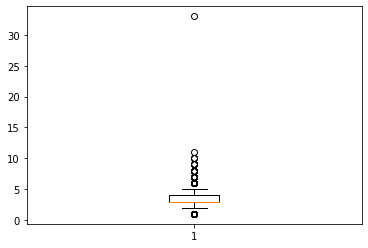

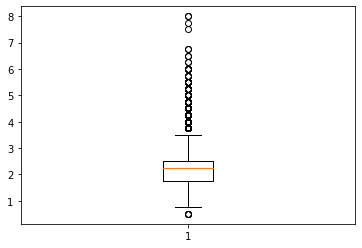

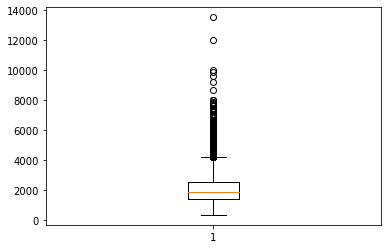

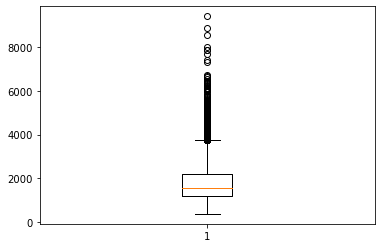

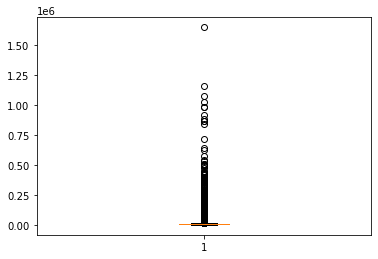

In [107]:
# Check continuous predictors for outliers using Boxplot 

outliers = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot']

for outlier in outliers:
    plt.figure()
    plt.boxplot(house_data_df[outlier]);

In [108]:
#The date, __waterfront__, __view__, __condition__, __grade__, __sqft_basement__ columns are stored as type object, 
#we will need to remove or convert to numerical data type before modeling.
 
 #Erroneous or Outlier Data
 
# The 33 bedroom home, appears to be an extreme outlier!
#sqft_lot__ and __sqft_living__ have some heavy outliers as well, I will remove during modeling.

In [109]:
#Create copy to use for visualization later
kc_house_df = house_data_df.copy()
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In this section, I will clean the dataset by removing irrelevant columns to my analysis and trim the dataset of null values.  -__sqft_basement__ is stored as an object and has several '?' entries.  We will calculate __sqft_basement__ by subtracting __sqft_above__ from __sqft_living__ and then change column to boolean __has_basement__ instead. I will also add a boolean __renovated__ column for houses that have been renovated in the last 30 years.  Categorical columns containing strings will be converted to numeric type data. Outliers from __bedrooms__ will be removed. __bathrooms__ will be binned to limit number of variables.

In [110]:
# Columns dropped
dropped_columns = ['id', 'date', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'yr_built', 'lat', 'long']
house_data_df = house_data_df.drop(dropped_columns, axis=1)
house_data_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [111]:
# Calculate sqft_basement from sqft_living - sqft_above
house_data_df['sqft_basement'] = house_data_df['sqft_living'] - house_data_df['sqft_above']
house_data_df['sqft_basement'].astype('int')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

In [112]:
house_data_df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [113]:
# Convert to boolean
house_data_df['has_basement'] = house_data_df['sqft_basement'] > 0
house_data_df['has_basement'] = house_data_df['has_basement'].astype(int)
# Check to see if it worked
house_data_df['has_basement'].value_counts()

0    13110
1     8487
Name: has_basement, dtype: int64

In [114]:
# Change yr_renovated to boolean_renovated
# 30 years as cutoff for renovation, houses renovated more than 30 years ago are good as not renovated
house_data_df['renovated'] = (house_data_df['yr_renovated'] > 1985).astype(int)
#Check to see if it worked
house_data_df.renovated.value_counts()

0    21016
1      581
Name: renovated, dtype: int64

In [115]:
# Dropping old columns
house_data_df = house_data_df.drop('yr_renovated', axis=1)
house_data_df = house_data_df.drop('sqft_basement', axis=1)

In [116]:
# Investigate 33 bedroom house
house_data_df.loc[house_data_df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
15856,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,98103,1,0


In [117]:
# from the size of the sqft_living, the 33 bedrooms is definately an outlier
# Remove outlier
house_data_df = house_data_df.loc[(house_data_df['bedrooms'] != 33)]
house_data_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,98178,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,98125,1,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,98028,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,98136,1,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,98074,0,0


In [118]:
# Convert categorical strings to integers
house_data_df['waterfront'] = house_data_df['waterfront'].replace(('YES', 'NO'), (1, 0))
house_data_df['view'] = house_data_df['view'].replace(('NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT')
                                , (0, 1, 2, 3, 4))
house_data_df['condition'] = house_data_df['condition'].replace(('Poor', 'Fair', 'Average', 'Good', 'Very Good')
                                , (0, 1, 2, 3, 4))
house_data_df['grade'] = house_data_df['grade'].replace(('3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
                                   , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion')
                                , (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [119]:
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21596 non-null  float64
 1   bedrooms      21596 non-null  int64  
 2   bathrooms     21596 non-null  float64
 3   sqft_living   21596 non-null  int64  
 4   sqft_lot      21596 non-null  int64  
 5   floors        21596 non-null  float64
 6   waterfront    21596 non-null  int64  
 7   view          21596 non-null  int64  
 8   condition     21596 non-null  int64  
 9   grade         21596 non-null  int64  
 10  sqft_above    21596 non-null  int64  
 11  zipcode       21596 non-null  int64  
 12  has_basement  21596 non-null  int32  
 13  renovated     21596 non-null  int32  
dtypes: float64(3), int32(2), int64(9)
memory usage: 2.3 MB


In [120]:
# convert to category type
categorical = ['bedrooms','floors','waterfront','view','condition','grade', 'zipcode', 'renovated','has_basement']
cont = ['sqft_living', 'sqft_lot', 'sqft_above']

for column in house_data_df[categorical]:
    house_data_df[categorical] = house_data_df[categorical].astype('category')   

In [121]:
#Create Dummy Variables
house_data_df = pd.get_dummies(house_data_df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

house_data_df.columns = [col_formatting(col) for col in house_data_df.columns]

house_data_df.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,221900.0,1.00,1180,5650,1180,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2.25,2570,7242,2170,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,1.00,770,10000,770,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,3.00,1960,5000,1050,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,2.00,1680,8080,1680,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


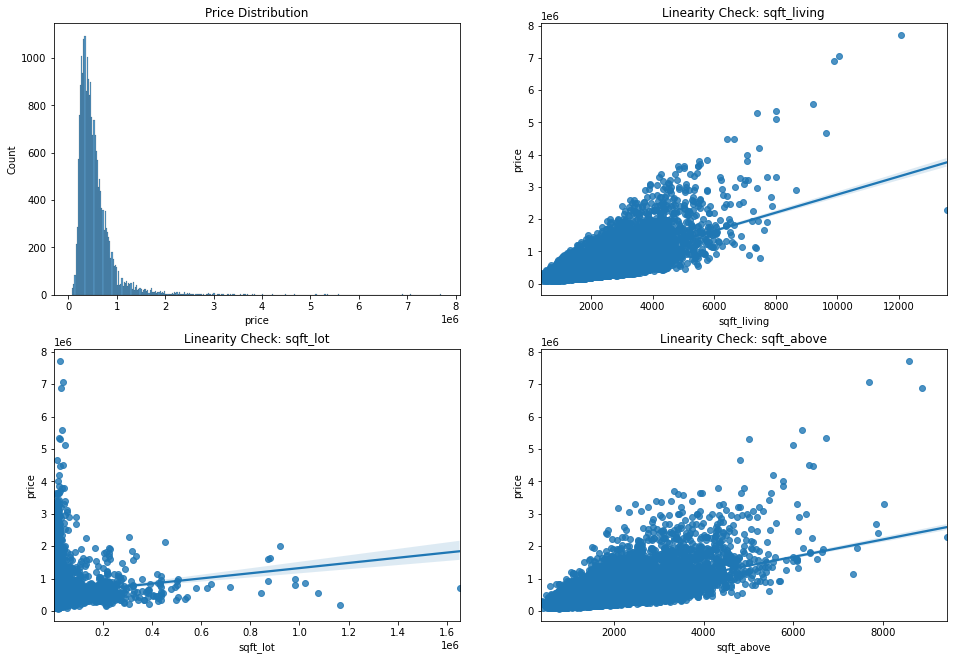

In [122]:
# Pre-Modeling Linearity Check
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(house_data_df['price'], ax=axes[0][0]).set_title('Price Distribution')

# Regplot
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=house_data_df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

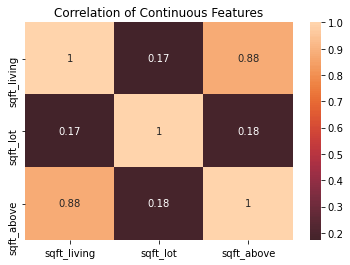

In [123]:
# Pre-Modeling Multicollinearity Check
corr = house_data_df[cont].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

In [124]:
#from above output ,multicollinearity is present between __sqft_living__ and __sqft_above
# We drop the collinear feature
df = house_data_df.drop('sqft_above', axis=1)



# MODELLING BEGINS



In [125]:
# Train Test Split and Model Function
#Name variables
X = house_data_df.drop('price', axis=1)
y = house_data_df['price']
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [126]:
#Model function
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

### BASE MODEL - I START BY CREATING A SIMPLE MODEL(A) THAT ACTS AS OUR REFERENCE 

In [127]:
modelA = model(X_train,X_test,y_train,y_test);

Train R2:  0.8370638538227984
Test R2:  0.8277451170830512
Train RMSE:  150297.29340820707
Test RMSE:  143917.28728478303


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     809.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:36:29   Log-Likelihood:            -2.3045e+05
No. Observations:               17276   AIC:                         4.611e+05
Df Residuals:                   17166   BIC:                         4.620e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.683e+04   1.55e+05      0.174      0.862   -2.76e+05     3.3e+05
bathrooms       2.234e+04   2693.922      8.292      0.000    1.71e+04    2.76e+04
sqft_living      135.8316      5.290     25.677      0.000     125.463     146.200
sqft_lot           0.1502      0.031      4.871      0.000       0.090       0.211
sqft_above        36.7116      5.898      6.225      0.000      25.151      48.272
bedrooms_2      1.015e+04   1.27e+04      0.797      0.426   -1.48e+04    3.51e+04
bedrooms_3      1.127e+04   1.27e+04      0.885      0.376   -1.37e+04    3.62e+04
bedrooms_4     -8779.7346    1.3e+04     -0.674      0.500   -3.43e+04    1.67e+04
bedrooms_5     -1.649e+04   1.38e+04     -1.199      0.231   -4.34e+04    1.05e+04
bedrooms_6     -4.101e+04   1.68e+04     -2.446      0.014   -7.39e+04   -8146.921
bedrooms_7     -1.185e+05   3.14e+04     -3.775      0.000    -1.8e+05    -5.7e+04
bedrooms_8     -1.423e+04   4.62e+04     -0.308      0.758   -1.05e+05    7.63e+04
bedrooms_9     -2.252e+05   6.37e+04     -3.534      0.000    -3.5e+05      -1e+05
bedrooms_10    -3.808e+05   1.08e+05     -3.529      0.000   -5.92e+05   -1.69e+05
bedrooms_11     -1.05e+05   1.52e+05     -0.692      0.489   -4.03e+05    1.93e+05
floors_15      -9477.0285   4565.154     -2.076      0.038   -1.84e+04    -528.860
floors_20      -3.495e+04   3794.975     -9.209      0.000   -4.24e+04   -2.75e+04
floors_25       4.459e+04   1.39e+04      3.219      0.001    1.74e+04    7.17e+04
floors_30      -9.309e+04   8212.751    -11.335      0.000   -1.09e+05    -7.7e+04
floors_35      -7899.6876   6.24e+04     -0.127      0.899    -1.3e+05    1.14e+05
waterfront_1    6.581e+05   1.74e+04     37.894      0.000    6.24e+05    6.92e+05
view_1          7.033e+04   5859.517     12.002      0.000    5.88e+04    8.18e+04
view_2          1.594e+05   8012.584     19.897      0.000    1.44e+05    1.75e+05
view_3          8.586e+04   9777.920      8.781      0.000    6.67e+04    1.05e+05
view_4          2.638e+05   1.18e+04     22.372      0.000    2.41e+05    2.87e+05
condition_1     6.209e+04   3.32e+04      1.868      0.062   -3057.266    1.27e+05
condition_2     7.198e+04   3.06e+04      2.353      0.019     1.2e+04    1.32e+05
condition_3     9.997e+04   3.06e+04      3.265      0.001    3.99e+04     1.6e+05
condition_4     1.446e+05   3.08e+04      4.692      0.000    8.42e+04    2.05e+05
grade_4        -1.345e+05   1.55e+05     -0.869      0.385   -4.38e+05    1.69e+05
grade_5         -1.94e+05   1.52e+05     -1.276      0.202   -4.92e+05    1.04e+05
grade_6        -1.998e+05   1.52e+05     -1.316      0.188   -4.97e+05    9.78e+04
grade_7        -2.021e+05   1.52e+05     -1.331      0.183      -5e+05    9.55e+04
grade_8        -1.768e+05   1.52e+05     -1.164      0.244   -4.74e+05    1.21e+05
grade_9     

The baseline model has an R2 value of 0.837, which means that 83.7% of the model’s observed variance can be explained by the features. The train RMSE is  150297.293, which means that this model predicts within $ 150297.30 of the actual home value. The baseline model also produced a skew of 2.864 , indicated the data is not normally distributed. The kurtosis of the baseline model is high at 50.233	 indicating a heavy tail and outlier presence. We will look to improve on these numbers. 
There are several features with p_values that are insignificant, but before we drop these features from the data, let's check our residuals.  Our baseline RMSE are as follow:  
_Train RMSE:  150297.293
_Test RMSE:  143917.287

In [128]:
###ASSUMPTIONS CHECK

In [129]:
# Function for qq_plots
def qq_plot(model):
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

    ax0.hist(model.resid)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

    sm.qqplot(model.resid, stats.t, fit=True, line="45", ax=ax1)
    ax1.set(title='QQ Plot')

    fig.suptitle('Normality of Residuals')

    fig.show()
    return qq_plot

In [130]:
import os

# Create the image directory
os.makedirs('./images/', exist_ok=True)

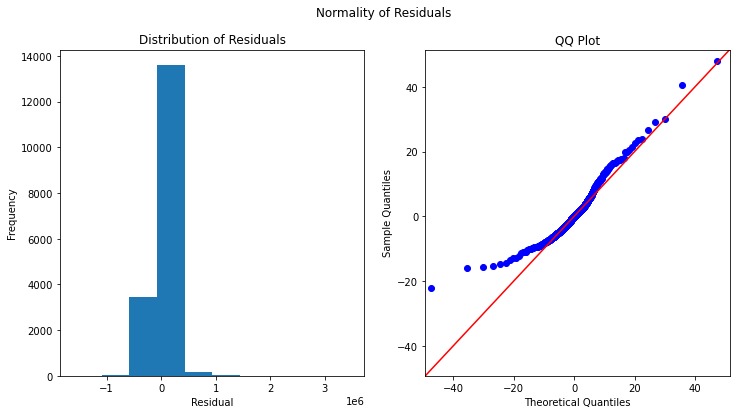

In [131]:
qq_plot(modelA);

#Save file
fig.savefig('./images/base_model_qq.png')

In [132]:
#From above, our residuals are not normal. This indicates presence of outliers

In [133]:
# Function to remove outliers
def remove_outliers(house_data_df):
    q25 = np.quantile(house_data_df,.25)
    q75 = np.quantile(house_data_df,.75)
    IQR = q75 - q25
    outliers = house_data_df.loc[((q25-1.5*IQR)>house_data_df) | (house_data_df>(q75+1.5*IQR))].index
    return outliers

In [134]:
def model_outlier(X_train, X_test, y_train, y_test):
   
    # remove outliers 
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
   # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # display summary and return the model
    display(model.summary())
    return model

In [135]:
# MODEL B
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=123)
modelB = model_outlier(X_train2,X_test2,y_train2,y_test2);

Train R2:  0.8349696639740928
Test R2:  0.8303827826937277
Train RMSE:  84226.05741785117
Test RMSE:  85975.48226964097


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     760.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:36:31   Log-Likelihood:            -2.0849e+05
No. Observations:               16339   AIC:                         4.172e+05
Df Residuals:                   16230   BIC:                         4.180e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.114e+04   8.67e+04      0.936      0.349   -8.88e+04    2.51e+05
bathrooms       8589.2784   1595.938      5.382      0.000    5461.063    1.17e+04
sqft_living       71.1812      3.368     21.136      0.000      64.580      77.782
sqft_lot           0.2834      0.018     15.791      0.000       0.248       0.319
sqft_above        51.8294      3.757     13.794      0.000      44.465      59.194
bedrooms_2      1.082e+04   7145.027      1.515      0.130   -3182.330    2.48e+04
bedrooms_3      1.908e+04   7152.132      2.668      0.008    5062.780    3.31e+04
bedrooms_4        1.9e+04   7332.764      2.591      0.010    4627.105    3.34e+04
bedrooms_5      7365.6915   7808.607      0.943      0.346   -7940.039    2.27e+04
bedrooms_6     -1.317e+04   9760.868     -1.350      0.177   -3.23e+04    5958.530
bedrooms_7     -8.154e+04   1.94e+04     -4.212      0.000   -1.19e+05   -4.36e+04
bedrooms_8     -5.525e+04    3.1e+04     -1.782      0.075   -1.16e+05    5533.356
bedrooms_9     -9.547e+04   4.33e+04     -2.204      0.028    -1.8e+05   -1.06e+04
bedrooms_10    -6.342e+04   8.52e+04     -0.745      0.457    -2.3e+05    1.04e+05
bedrooms_11     2711.4462   8.51e+04      0.032      0.975   -1.64e+05     1.7e+05
floors_15       4694.8531   2627.922      1.787      0.074    -456.164    9845.870
floors_20      -2.107e+04   2227.237     -9.461      0.000   -2.54e+04   -1.67e+04
floors_25      -4.541e+04   9188.015     -4.942      0.000   -6.34e+04   -2.74e+04
floors_30      -7.567e+04   4791.305    -15.793      0.000   -8.51e+04   -6.63e+04
floors_35      -8.215e+04    3.8e+04     -2.161      0.031   -1.57e+05   -7629.406
waterfront_1     1.41e+05   1.53e+04      9.238      0.000    1.11e+05    1.71e+05
view_1          6.355e+04   3559.273     17.856      0.000    5.66e+04    7.05e+04
view_2          9.603e+04   5343.961     17.970      0.000    8.56e+04    1.07e+05
view_3          6.506e+04   6046.627     10.759      0.000    5.32e+04    7.69e+04
view_4          1.595e+05   8600.880     18.545      0.000    1.43e+05    1.76e+05
condition_1     3.761e+04    1.9e+04      1.983      0.047     432.699    7.48e+04
condition_2     6.303e+04   1.75e+04      3.598      0.000    2.87e+04    9.74e+04
condition_3     8.579e+04   1.75e+04      4.892      0.000    5.14e+04     1.2e+05
condition_4     1.181e+05   1.77e+04      6.686      0.000    8.34e+04    1.53e+05
grade_4        -1.372e+05   8.67e+04     -1.582      0.114   -3.07e+05    3.28e+04
grade_5        -1.729e+05   8.52e+04     -2.029      0.042    -3.4e+05   -5896.462
grade_6        -1.706e+05   8.51e+04     -2.005      0.045   -3.37e+05   -3838.097
grade_7         -1.49e+05   8.51e+04     -1.750      0.080   -3.16e+05    1.78e+04
grade_8        -1.045e+05   8.51e+04     -1.228      0.220   -2.71e+05    6.23e+04
grade_9     

Baseline R2 was 0.837,in this Model B it has reduced to 0.834.
Train RMSE was 150297.293, this has dropped to 84226.057; 
Test RMSE now is 85975.482 which is a big improvement from the RMSE of 143917.287 in our baseline model.
Difference between train and test RMSE is acceptable at ~2,000.
The skew improved to 0.408, and kurtosis to 5.763. 

In [138]:
# # We will now proceed to remove Outliers from Predictors Variables
# sqft_lot_outliers = remove_outliers(house_data_df['sqft_lot'])
# #sqft_living_outliers = remove_outliers(house_data_df['sqft_living'])
# # Check the existing indices in the DataFrame
# existing_indices = house_data_df.index

# # Filter sqft_living_outliers to contain only valid indices
# sqft_living_outliers = [index for index in sqft_living_outliers if index in existing_indices]

# # Now you can drop the outliers
# #house_data_df = house_data_df.drop(sqft_living_outliers)


In [143]:
valid_lot_outliers = [index for index in sqft_lot_outliers if index in house_data_df.index]
valid_living_outliers = [index for index in sqft_living_outliers if index in house_data_df.index]

In [144]:
# house_data_df = house_data_df.drop(sqft_lot_outliers)
# house_data_df = house_data_df.drop(sqft_living_outliers)
house_data_df = house_data_df.drop(valid_lot_outliers)
house_data_df = house_data_df.drop(valid_living_outliers)

In [145]:
#dropping the price
X_out = house_data_df.drop('price', axis=1)
y_out = house_data_df['price']
X.head()

,bathrooms,sqft_living,sqft_lot,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1.00,1180,5650,1180,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2.25,2570,7242,2170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1.00,770,10000,770,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.00,1960,5000,1050,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.00,1680,8080,1680,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# MODEL C
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_out,y_out,test_size=0.2, random_state=123)
modelC = model_outlier(X_train3,X_test3,y_train3,y_test3);

Train R2:  0.8391077239508966
Test R2:  0.8425803292260297
Train RMSE:  77358.01598035786
Test RMSE:  77507.95690171051


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     687.0
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:43:52   Log-Likelihood:            -1.7834e+05
No. Observations:               14070   AIC:                         3.569e+05
Df Residuals:                   13963   BIC:                         3.577e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.59e+04   8.05e+04      0.198      0.843   -1.42e+05    1.74e+05
bathrooms       9119.8718   1643.611      5.549      0.000    5898.174    1.23e+04
sqft_living       73.5030      3.671     20.024      0.000      66.308      80.698
sqft_lot           1.8873      0.301      6.265      0.000       1.297       2.478
sqft_above        52.5822      4.072     12.914      0.000      44.601      60.563
bedrooms_2      1.632e+04   7108.410      2.296      0.022    2386.366    3.03e+04
bedrooms_3      2.058e+04   7133.192      2.885      0.004    6595.739    3.46e+04
bedrooms_4       1.94e+04   7330.598      2.646      0.008    5026.962    3.38e+04
bedrooms_5      6097.3802   7843.898      0.777      0.437   -9277.709    2.15e+04
bedrooms_6     -1.661e+04   9929.705     -1.672      0.094   -3.61e+04    2857.270
bedrooms_7     -7.147e+04   1.99e+04     -3.597      0.000    -1.1e+05   -3.25e+04
bedrooms_8     -3.024e+04   3.57e+04     -0.846      0.397      -1e+05    3.98e+04
bedrooms_9      -1.85e+04   4.59e+04     -0.403      0.687   -1.08e+05    7.14e+04
bedrooms_10    -6.913e+04   7.84e+04     -0.882      0.378   -2.23e+05    8.45e+04
bedrooms_11    -6.375e-09   1.17e-09     -5.430      0.000   -8.68e-09   -4.07e-09
floors_15       8104.5581   2661.905      3.045      0.002    2886.868    1.33e+04
floors_20      -1.672e+04   2420.384     -6.909      0.000   -2.15e+04    -1.2e+04
floors_25      -2.872e+04   9586.058     -2.996      0.003   -4.75e+04   -9929.726
floors_30      -6.665e+04   4720.739    -14.117      0.000   -7.59e+04   -5.74e+04
floors_35       -7.57e+04    3.2e+04     -2.369      0.018   -1.38e+05   -1.31e+04
waterfront_1    1.833e+05   2.12e+04      8.658      0.000    1.42e+05    2.25e+05
view_1          6.626e+04   3720.627     17.810      0.000     5.9e+04    7.36e+04
view_2          8.844e+04   6128.421     14.431      0.000    7.64e+04       1e+05
view_3          6.742e+04   5968.740     11.296      0.000    5.57e+04    7.91e+04
view_4          1.994e+05   1.06e+04     18.725      0.000    1.79e+05     2.2e+05
condition_1     8.075e+04      2e+04      4.031      0.000    4.15e+04     1.2e+05
condition_2     9.905e+04   1.85e+04      5.343      0.000    6.27e+04    1.35e+05
condition_3     1.204e+05   1.86e+04      6.491      0.000    8.41e+04    1.57e+05
condition_4     1.529e+05   1.86e+04      8.197      0.000    1.16e+05    1.89e+05
grade_4        -1.344e+05   8.09e+04     -1.662      0.097   -2.93e+05    2.42e+04
grade_5        -1.718e+05   7.85e+04     -2.188      0.029   -3.26e+05   -1.79e+04
grade_6        -1.649e+05   7.83e+04     -2.105      0.035   -3.18e+05   -1.13e+04
grade_7        -1.455e+05   7.84e+04     -1.856      0.063   -2.99e+05    8136.533
grade_8        -1.045e+05   7.84e+04     -1.333      0.183   -2.58e+05    4.92e+04
grade_9     

Train RMSE: 77358.015; Test RMSE:77507.956.  Another improvement on lowering our RMSE from 84226.057 and 85975.482 respectively.Difference between train and test RMSE is acceptable at ~1,000.  Model is not overfittted.
Distibution of residuals is close to normal, still have some light tails.
Fail homoscedasticity check, higher prices remain underpredicted.

In [154]:
high_p_value = ['bedrooms_2','bedrooms_5','bedrooms_6','bedrooms_9','bedrooms_10','bedrooms_11',
          'floors_15','floors_20','floors_25','floors_35','condition_1','grade_4','grade_7','grade_8','grade_9','grade_10',
          'grade_11','grade_12','grade_13','zipcode_98002','zipcode_98003','zipcode_98022','zipcode_98023','zipcode_98030',
          'zipcode_98032','zipcode_98092']

In [155]:
#Create new dataframe with significant p-values
sig_X = X_out.drop(high_p_value, axis=1)

In [156]:
# MODEL D
X_train4, X_test4, y_train4, y_test4 = train_test_split(sig_X,y_out,test_size=0.2, random_state=123)
modelD= model_outlier(X_train4,X_test4,y_train4,y_test4);

Train R2:  0.819014647406843
Test R2:  0.8220500883656773
Train RMSE:  82046.38283602502
Test RMSE:  82407.29856540676


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     762.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:56:01   Log-Likelihood:            -1.7917e+05
No. Observations:               14070   AIC:                         3.585e+05
Df Residuals:                   13986   BIC:                         3.591e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.058e+05   8895.707    -11.891      0.000   -1.23e+05   -8.83e+04
bathrooms       8594.8895   1592.394      5.397      0.000    5473.585    1.17e+04
sqft_living       77.4013      3.690     20.974      0.000      70.168      84.635
sqft_lot           2.7449      0.298      9.196      0.000       2.160       3.330
sqft_above        79.5438      3.915     20.316      0.000      71.869      87.218
bedrooms_3      8928.3753   1884.293      4.738      0.000    5234.909    1.26e+04
bedrooms_4      8233.0851   2157.851      3.815      0.000    4003.410    1.25e+04
bedrooms_7     -1.092e+05   1.96e+04     -5.580      0.000   -1.47e+05   -7.08e+04
bedrooms_8     -8.343e+04    3.7e+04     -2.252      0.024   -1.56e+05   -1.08e+04
floors_30      -3.654e+04   4461.077     -8.190      0.000   -4.53e+04   -2.78e+04
waterfront_1    1.601e+05   2.24e+04      7.150      0.000    1.16e+05    2.04e+05
view_1          7.726e+04   3923.239     19.692      0.000    6.96e+04    8.49e+04
view_2          1.065e+05   6464.886     16.474      0.000    9.38e+04    1.19e+05
view_3          7.326e+04   6316.345     11.599      0.000    6.09e+04    8.56e+04
view_4          2.189e+05   1.13e+04     19.442      0.000    1.97e+05    2.41e+05
condition_2      3.85e+04   7746.078      4.970      0.000    2.33e+04    5.37e+04
condition_3     5.573e+04   7795.370      7.149      0.000    4.05e+04     7.1e+04
condition_4     8.736e+04   8065.425     10.831      0.000    7.15e+04    1.03e+05
grade_5        -1.514e+04   7194.221     -2.105      0.035   -2.92e+04   -1041.367
grade_6        -1.357e+04   2626.329     -5.167      0.000   -1.87e+04   -8421.724
zipcode_98004   5.348e+05   8815.849     60.664      0.000    5.18e+05    5.52e+05
zipcode_98005   3.664e+05   9208.423     39.793      0.000    3.48e+05    3.84e+05
zipcode_98006   3.058e+05   5505.524     55.547      0.000    2.95e+05    3.17e+05
zipcode_98007   2.779e+05   8682.911     32.000      0.000    2.61e+05    2.95e+05
zipcode_98008   2.588e+05   6121.161     42.286      0.000    2.47e+05    2.71e+05
zipcode_98010   9.341e+04   1.43e+04      6.531      0.000    6.54e+04    1.21e+05
zipcode_98011   1.623e+05   7236.792     22.426      0.000    1.48e+05    1.76e+05
zipcode_98014   1.092e+05    1.5e+04      7.292      0.000    7.98e+04    1.39e+05
zipcode_98019   8.981e+04   8155.951     11.012      0.000    7.38e+04    1.06e+05
zipcode_98024   1.388e+05   1.95e+04      7.100      0.000       1e+05    1.77e+05
zipcode_98027   2.588e+05   6329.172     40.895      0.000    2.46e+05    2.71e+05
zipcode_98028   1.482e+05   6343.955     23.359      0.000    1.36e+05    1.61e+05
zipcode_98029   2.584e+05   5868.869     44.031      0.000    2.47e+05     2.7e+05
zipcode_98031   1.678e+04   6220.963      2.698      0.007    4589.491     2.9e+04
zipcode_9803

Previously R2 was 0.839, for this model we lowered it to 0.819.
Train RMSE: 82046.38 ; and Test RMSE:82407.298.  
Distibution of residuals is close to normal, still have some light tails.

In [157]:
# Next I will log transform price.
log_y = np.log(y_out)


In [159]:
# Model function to reverse log transform for metrics
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [160]:
# MODEL E
X_train5, X_test5, y_train5, y_test5 = train_test_split(sig_X,log_y,test_size=0.2,random_state=123)
modelE = model_log(X_train5,X_test5,y_train5,y_test5);

Train R2:  0.8542148898484567
Test R2:  0.8611984411589789
Train RMSE:  105188.78422396547
Test RMSE:  102076.27499047936


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1025.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:15:21   Log-Likelihood:                 4135.7
No. Observations:               14608   AIC:                            -8103.
Df Residuals:                   14524   BIC:                            -7466.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.5756      0.020    592.795      0.000      11.537      11.614
bathrooms          0.0356      0.003     10.348      0.000       0.029       0.042
sqft_living        0.0002   7.75e-06     21.123      0.000       0.000       0.000
sqft_lot        6.458e-06    6.5e-07      9.937      0.000    5.18e-06    7.73e-06
sqft_above         0.0002   8.23e-06     20.451      0.000       0.000       0.000
bedrooms_3         0.0251      0.004      6.096      0.000       0.017       0.033
bedrooms_4         0.0265      0.005      5.691      0.000       0.017       0.036
bedrooms_7        -0.2638      0.042     -6.238      0.000      -0.347      -0.181
bedrooms_8        -0.2290      0.082     -2.786      0.005      -0.390      -0.068
floors_30         -0.0789      0.010     -8.179      0.000      -0.098      -0.060
waterfront_1       0.4666      0.033     14.110      0.000       0.402       0.531
view_1             0.1527      0.008     18.534      0.000       0.137       0.169
view_2             0.2594      0.012     21.053      0.000       0.235       0.284
view_3             0.1488      0.013     11.369      0.000       0.123       0.174
view_4             0.4055      0.019     21.674      0.000       0.369       0.442
condition_2        0.1440      0.017      8.409      0.000       0.110       0.178
condition_3        0.1801      0.017     10.450      0.000       0.146       0.214
condition_4        0.2407      0.018     13.523      0.000       0.206       0.276
grade_5           -0.2011      0.016    -12.611      0.000      -0.232      -0.170
grade_6           -0.0856      0.006    -14.763      0.000      -0.097      -0.074
zipcode_98004      1.1587      0.016     74.268      0.000       1.128       1.189
zipcode_98005      0.8205      0.020     40.978      0.000       0.781       0.860
zipcode_98006      0.7017      0.012     59.648      0.000       0.679       0.725
zipcode_98007      0.6882      0.019     36.199      0.000       0.651       0.725
zipcode_98008      0.6723      0.013     49.856      0.000       0.646       0.699
zipcode_98010      0.2400      0.032      7.553      0.000       0.178       0.302
zipcode_98011      0.4719      0.016     29.355      0.000       0.440       0.503
zipcode_98014      0.2562      0.033      7.703      0.000       0.191       0.321
zipcode_98019      0.3060      0.018     16.891      0.000       0.270       0.341
zipcode_98024      0.4102      0.043      9.445      0.000       0.325       0.495
zipcode_98027      0.6342      0.014     45.327      0.000       0.607       0.662
zipcode_98028      0.4317      0.014     30.633      0.000       0.404       0.459
zipcode_98029      0.6522      0.013     50.318      0.000       0.627       0.678
zipcode_98031      0.0695      0.014      5.026      0.000       0.042       0.097
zipcode_9803

R2 was 0.816, we have improved in this model to 0.852. A good model should have a high R2 (indicating it explains a significant portion of the variance
Train RMSE: 105188.784; Test RMSE: 102076.274 both higher than the previous model.
Distibution of residuals is close to normal, still have some light tails indicating that errors are likely for extreme values. Homoscedasticity has greatly improved! Homes on the lower end now are more overpredicted, but due to the fact that we want a wide range of prices in our model it is acceptable.
* Even though our RMSE has increased, this is our best performing model because it passes the assumptions of regression.

#FINAL MODEL
To determine which features have the most impact on sale price, I will update my model fuction 
to scale the data using Standard Scaler.  
This will allow us to compare the effects of each feature on a level playing ground.

In [163]:
# Model function to reverse log transform for metrics
def model_scale_log(X_train, X_test, y_train, y_test):
    
    standardizer = StandardScaler()

    X_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)
    
    X_train_scaled['price'] = y_train.values
    X_test_scaled['price'] = y_test.values
    
    # statsmodels
    outcome = 'price'
    predictors = X_train_scaled.drop('price', axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data=X_train_scaled).fit()
    
    # sklearn
    X_train_scaled = X_train_scaled.drop('price', axis=1)
    X_test_scaled = X_test_scaled.drop('price', axis=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)
    
    y_hat_train_log = linreg.predict(X_train_scaled)
    y_hat_test_log = linreg.predict(X_test_scaled)
    
    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train_scaled, y_train))
    print("Test R2: ", linreg.score(X_test_scaled, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [165]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(sig_X,log_y,test_size=0.2,random_state=123)
modelF = model_scale_log(X_train6,X_test6,y_train6,y_test6);

Train R2:  0.8542148898484567
Test R2:  0.8611984411588918
Train RMSE:  105188.78422398797
Test RMSE:  102076.274990479


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1025.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:43:37   Log-Likelihood:                 4135.7
No. Observations:               14608   AIC:                            -8103.
Df Residuals:                   14524   BIC:                            -7466.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.9864      0.002   8584.621      0.000      12.983      12.989
bathrooms          0.0250      0.002     10.348      0.000       0.020       0.030
sqft_living        0.1172      0.006     21.123      0.000       0.106       0.128
sqft_lot           0.0209      0.002      9.937      0.000       0.017       0.025
sqft_above         0.1127      0.006     20.451      0.000       0.102       0.124
bedrooms_3         0.0125      0.002      6.096      0.000       0.008       0.017
bedrooms_4         0.0122      0.002      5.691      0.000       0.008       0.016
bedrooms_7        -0.0095      0.002     -6.238      0.000      -0.012      -0.007
bedrooms_8        -0.0042      0.002     -2.786      0.005      -0.007      -0.001
floors_30         -0.0140      0.002     -8.179      0.000      -0.017      -0.011
waterfront_1       0.0250      0.002     14.110      0.000       0.022       0.028
view_1             0.0289      0.002     18.534      0.000       0.026       0.032
view_2             0.0328      0.002     21.053      0.000       0.030       0.036
view_3             0.0176      0.002     11.369      0.000       0.015       0.021
view_4             0.0385      0.002     21.674      0.000       0.035       0.042
condition_2        0.0687      0.008      8.409      0.000       0.053       0.085
condition_3        0.0788      0.008     10.450      0.000       0.064       0.094
condition_4        0.0664      0.005     13.523      0.000       0.057       0.076
grade_5           -0.0199      0.002    -12.611      0.000      -0.023      -0.017
grade_6           -0.0257      0.002    -14.763      0.000      -0.029      -0.022
zipcode_98004      0.1180      0.002     74.268      0.000       0.115       0.121
zipcode_98005      0.0638      0.002     40.978      0.000       0.061       0.067
zipcode_98006      0.0992      0.002     59.648      0.000       0.096       0.102
zipcode_98007      0.0565      0.002     36.199      0.000       0.053       0.060
zipcode_98008      0.0802      0.002     49.856      0.000       0.077       0.083
zipcode_98010      0.0116      0.002      7.553      0.000       0.009       0.015
zipcode_98011      0.0463      0.002     29.355      0.000       0.043       0.049
zipcode_98014      0.0118      0.002      7.703      0.000       0.009       0.015
zipcode_98019      0.0265      0.002     16.891      0.000       0.023       0.030
zipcode_98024      0.0144      0.002      9.445      0.000       0.011       0.017
zipcode_98027      0.0730      0.002     45.327      0.000       0.070       0.076
zipcode_98028      0.0489      0.002     30.633      0.000       0.046       0.052
zipcode_98029      0.0826      0.002     50.318      0.000       0.079       0.086
zipcode_98031      0.0080      0.002      5.026      0.000       0.005       0.011
zipcode_9803

* Features with the positive impact on sale price have been ranked below.  

In [167]:
modelF.params.sort_values(ascending=False).head(20)

Intercept        12.986378
zipcode_98103     0.155069
zipcode_98117     0.146840
zipcode_98115     0.143763
zipcode_98112     0.129036
zipcode_98004     0.117957
zipcode_98199     0.117343
sqft_living       0.117180
sqft_above        0.112722
zipcode_98033     0.112274
zipcode_98052     0.110725
zipcode_98122     0.107674
zipcode_98105     0.107035
zipcode_98107     0.105817
zipcode_98116     0.103829
zipcode_98119     0.101051
zipcode_98040     0.099220
zipcode_98006     0.099191
zipcode_98144     0.091153
zipcode_98034     0.088754
dtype: float64

In [ ]:
#The most important predictors of price are zipcode,sqft_living and sqft_above

* Features with the most negative impact on sale price

In [168]:
modelF.params.sort_values(ascending=False).tail(20)

zipcode_98055    0.016346
zipcode_98178    0.016009
zipcode_98024    0.014391
renovated_1      0.012776
bedrooms_3       0.012503
bedrooms_4       0.012223
zipcode_98014    0.011789
zipcode_98010    0.011565
zipcode_98031    0.008033
zipcode_98148    0.007628
zipcode_98070    0.007562
zipcode_98168    0.007301
zipcode_98188    0.006297
zipcode_98198    0.005789
zipcode_98042    0.005506
bedrooms_8      -0.004236
bedrooms_7      -0.009508
floors_30       -0.013990
grade_5         -0.019867
grade_6         -0.025736
dtype: float64

In [ ]:
#features with a negative impact to the houseprice are when the grade is 5 or 6,if the houses has 3 floors,
#if the house has 7 or 8 bedrooms

Multiple linear regression analysis was used to build a model to predict housing prices in King County. After 5 iterations from our baseline model, the results of the final regression model (Model E) indicated that 83 predictors explained 85.4% of the variance in the dataset(R2= 0.854). The RMSE of the final model was $105,188.78, which is the error in our price prediction. Difference between train and test set metrics showed that our model was not overfitted or underfitted.  All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05.

Following are features that have the most positive effect on sale price:

* For every 1 square foot of living space, the price is increased by 0.03%.

Following are features that have the most negative impact on sale price:

* Homes with 3 floors decreases the price by 7.49%.  More floors is less desirable.

Following are some other notable conclusions:

* Price for homes with a waterfront are 64.5% higher than homes without a waterfront.
* Homes that have been renovated in the last 30 years will increase the price by 8.40%.
